In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from statsmodels.stats.multitest import multipletests
%matplotlib inline

In [3]:
path = '/home/mragletdinov/new_science/data'

In [4]:
def list_of_AEI_for_body(name_of_body: str) -> list:
    """Функция на вход получает название ткани. Возвращает список AEI"""
    return list(df_with_WGS_WES.query(f"Body_Site == '{name_of_body}'").AEI)

In [5]:
def list_of_expression_for_body(name_of_body: str, type_of_genes: str) -> list:
    """Функция на вход получает название ткани. Возвращает список экспрессий для данного гена ADAR"""
    return list(df_with_WGS_WES.query(f"Body_Site == '{name_of_body}'")[f'{type_of_genes}'])

In [6]:
df = pd.read_csv(f'{path}/REDIportal.csv')
df

,Sample,WGS/WES,Source,Organism,Events,Hyper,Body Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR1068687,SRR8233673,G,Hs,70899,37029,Esophagus - Gastroesophageal Junction,normal,B,1.945,9.837,107.769,110.507,0.661
1,SRR1068788,SRR8233590,G,Hs,38638,18223,Testis,normal,B,1.044,1.176,64.808,8.449,2.666
2,SRR1068808,SRR8233539,G,Hs,43742,10676,Cells - Transformed fibroblasts,normal,B,1.228,0.821,135.680,66.248,0.000
3,SRR1068832,SRR8233604,G,Hs,58585,20656,Artery - Coronary,normal,B,1.331,18.443,70.764,57.324,0.030
4,SRR1068855,SRR8233664,G,Hs,28657,11837,Muscle - Skeletal,normal,B,0.709,1.002,7.915,6.297,0.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9637,SRR821846,SRR8233504,G,Hs,71179,16768,Artery - Coronary,normal,B,1.159,8.128,63.457,25.595,0.429
9638,SRR823967,NaN,G,Hs,53449,0,Cells - Leukemia cell line (CML),normal,B,0.993,0.316,88.031,6.687,0.015
9639,SRR823991,NaN,G,Hs,56252,0,Cells - Leukemia cell line (CML),normal,B,0.963,0.321,84.780,6.055,0.038
9640,SRR824015,NaN,G,Hs,52086,0,Cells - Leukemia cell line (CML),normal,B,0.929,0.239,71.895,5.807,0.006


In [139]:
df.Type.unique()# в нет данных по single cell

array(['B'], dtype=object)

In [138]:
df.Status.unique()# в таблице данные только по здоровым тканям

array(['normal'], dtype=object)

In [9]:
df.shape

(9642, 14)

In [10]:
df.drop_duplicates().shape

(9642, 14)

In [11]:
df = df.rename(columns={'WGS/WES':'WGS_WES', 'Body Site':'Body_Site'})

In [12]:
df_with_WGS_WES = df.dropna(subset=['WGS_WES', 'AEI', 'ADAR'])

In [13]:
df_with_WGS_WES

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR1068687,SRR8233673,G,Hs,70899,37029,Esophagus - Gastroesophageal Junction,normal,B,1.945,9.837,107.769,110.507,0.661
1,SRR1068788,SRR8233590,G,Hs,38638,18223,Testis,normal,B,1.044,1.176,64.808,8.449,2.666
2,SRR1068808,SRR8233539,G,Hs,43742,10676,Cells - Transformed fibroblasts,normal,B,1.228,0.821,135.680,66.248,0.000
3,SRR1068832,SRR8233604,G,Hs,58585,20656,Artery - Coronary,normal,B,1.331,18.443,70.764,57.324,0.030
4,SRR1068855,SRR8233664,G,Hs,28657,11837,Muscle - Skeletal,normal,B,0.709,1.002,7.915,6.297,0.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633,SRR821653,SRR8233630,G,Hs,16480,11944,Whole Blood,normal,B,1.669,1.168,15.250,0.695,0.083
9634,SRR821666,SRR8233504,G,Hs,28573,4855,Pancreas,normal,B,0.792,0.567,18.420,2.408,0.446
9635,SRR821690,SRR8233486,G,Hs,72245,19827,Brain - Hippocampus,normal,B,1.591,1.609,21.466,2.872,11.565
9636,SRR821715,SRR8233490,G,Hs,90194,30793,Adipose - Subcutaneous,normal,B,1.486,1.996,73.615,15.570,0.034


## Отфильтруем экстримальные значения

In [14]:
df_with_WGS_WES = df_with_WGS_WES.sort_values(by='ADAR', ascending=False).reset_index(drop=True)
df_with_WGS_WES

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR657777,SRR8233503,G,Hs,0,0,Brain - Frontal Cortex (BA9),normal,B,1.683,2.710,998.478,0.000,0.000
1,SRR1087511,SRR8233521,G,Hs,0,0,Adrenal Gland,normal,B,1.234,0.632,737.668,0.000,0.000
2,SRR662174,SRR8233562,G,Hs,38287,0,Cells - EBV-transformed lymphocytes,normal,B,1.363,0.680,501.014,0.358,8.099
3,SRR810957,SRR8233646,G,Hs,235838,0,Brain - Cerebellum,normal,B,3.334,5.104,490.640,80.239,4.787
4,SRR1440763,SRR8233646,G,Hs,194821,0,Brain - Cerebellar Hemisphere,normal,B,3.736,6.261,483.470,109.270,3.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,SRR1500405,SRR8233705,G,Hs,31915,0,Brain - Nucleus accumbens (basal ganglia),normal,B,1.812,2.179,0.000,0.000,0.000
8538,SRR1074956,SRR8233518,G,Hs,0,0,Cells - Transformed fibroblasts,normal,B,0.000,0.692,0.000,0.000,0.000
8539,SRR1470035,SRR8233253,G,Hs,101751,0,Brain - Spinal cord (cervical c-1),normal,B,1.815,1.521,0.000,0.000,0.000
8540,SRR1389177,SRR8233733,G,Hs,24249,0,Muscle - Skeletal,normal,B,0.878,0.418,0.000,0.000,0.000


In [15]:
df_with_WGS_WES = df_with_WGS_WES.iloc[3:].reset_index(drop=True)
df_with_WGS_WES

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR810957,SRR8233646,G,Hs,235838,0,Brain - Cerebellum,normal,B,3.334,5.104,490.640,80.239,4.787
1,SRR1440763,SRR8233646,G,Hs,194821,0,Brain - Cerebellar Hemisphere,normal,B,3.736,6.261,483.470,109.270,3.340
2,SRR1096383,SRR8233662,G,Hs,16712,0,Adipose - Subcutaneous,normal,B,1.419,6.845,446.828,0.000,0.000
3,SRR820914,SRR8233616,G,Hs,0,0,Cells - EBV-transformed lymphocytes,normal,B,1.439,0.513,390.133,0.609,6.401
4,SRR660602,SRR8233575,G,Hs,41165,8762,Whole Blood,normal,B,0.956,1.741,380.451,6.879,0.018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,SRR1500405,SRR8233705,G,Hs,31915,0,Brain - Nucleus accumbens (basal ganglia),normal,B,1.812,2.179,0.000,0.000,0.000
8535,SRR1074956,SRR8233518,G,Hs,0,0,Cells - Transformed fibroblasts,normal,B,0.000,0.692,0.000,0.000,0.000
8536,SRR1470035,SRR8233253,G,Hs,101751,0,Brain - Spinal cord (cervical c-1),normal,B,1.815,1.521,0.000,0.000,0.000
8537,SRR1389177,SRR8233733,G,Hs,24249,0,Muscle - Skeletal,normal,B,0.878,0.418,0.000,0.000,0.000


In [16]:
df_with_WGS_WES = df_with_WGS_WES.sort_values(by='ADARB1', ascending=False).reset_index(drop=True)
df_with_WGS_WES#Отсеивать не будем

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR657444,SRR8233584,G,Hs,63256,0,Artery - Tibial,normal,B,2.361,40.640,84.820,343.620,0.225
1,SRR658621,SRR8233586,G,Hs,19457,34666,Artery - Tibial,normal,B,2.009,56.487,82.644,337.927,0.139
2,SRR2165527,SRR8233586,G,Hs,208884,37835,Artery - Tibial,normal,B,2.391,4.389,84.955,327.055,0.090
3,SRR662677,SRR8233603,G,Hs,80884,73527,Artery - Tibial,normal,B,2.105,26.238,92.461,319.706,0.265
4,SRR613843,SRR8233550,G,Hs,77719,66583,Artery - Tibial,normal,B,2.140,22.876,104.614,312.873,0.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,SRR1417749,SRR8233201,G,Hs,42826,0,Stomach,normal,B,1.179,3.386,0.000,0.000,0.000
8535,SRR1407470,SRR8233694,G,Hs,31814,0,Heart - Atrial Appendage,normal,B,1.988,2.433,0.000,0.000,0.000
8536,SRR1434889,SRR8233141,G,Hs,74938,0,Skin - Sun Exposed (Lower leg),normal,B,1.772,1.125,0.000,0.000,0.000
8537,SRR1408327,SRR8233248,G,Hs,37826,0,Brain - Putamen (basal ganglia),normal,B,1.592,1.042,0.000,0.000,0.000


In [17]:
df_with_WGS_WES = df_with_WGS_WES.sort_values(by='ADARB2', ascending=False).reset_index(drop=True)
df_with_WGS_WES

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR1085782,SRR8233659,G,Hs,64216,0,Brain - Spinal cord (cervical c-1),normal,B,2.104,1.097,57.766,5.605,91.059
1,SRR1072367,SRR8233659,G,Hs,52840,29987,Brain - Frontal Cortex (BA9),normal,B,1.870,0.835,51.555,4.681,64.410
2,SRR1443612,SRR8233193,G,Hs,44534,0,Brain - Spinal cord (cervical c-1),normal,B,1.558,0.782,60.274,4.391,63.361
3,SRR1458595,SRR8233289,G,Hs,74729,0,Brain - Spinal cord (cervical c-1),normal,B,1.929,1.376,68.420,4.473,63.320
4,SRR1488172,SRR8233528,G,Hs,62948,0,Brain - Spinal cord (cervical c-1),normal,B,2.091,1.730,64.079,4.630,62.556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8534,SRR1333125,SRR8233668,G,Hs,33367,0,Cells - Transformed fibroblasts,normal,B,1.043,2.838,61.867,68.293,0.000
8535,SRR1080720,SRR8233560,G,Hs,34467,10591,Cells - Transformed fibroblasts,normal,B,1.221,1.082,96.526,129.248,0.000
8536,SRR1318966,SRR8233627,G,Hs,63043,0,Cells - Transformed fibroblasts,normal,B,1.195,0.809,147.086,68.348,0.000
8537,SRR1445218,SRR8233294,G,Hs,44149,0,Liver,normal,B,1.698,1.088,22.641,6.698,0.000


In [18]:
df_with_WGS_WES = df_with_WGS_WES.iloc[1:]
df_with_WGS_WES = df_with_WGS_WES.reset_index(drop=True)
df_with_WGS_WES

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2
0,SRR1072367,SRR8233659,G,Hs,52840,29987,Brain - Frontal Cortex (BA9),normal,B,1.870,0.835,51.555,4.681,64.410
1,SRR1443612,SRR8233193,G,Hs,44534,0,Brain - Spinal cord (cervical c-1),normal,B,1.558,0.782,60.274,4.391,63.361
2,SRR1458595,SRR8233289,G,Hs,74729,0,Brain - Spinal cord (cervical c-1),normal,B,1.929,1.376,68.420,4.473,63.320
3,SRR1488172,SRR8233528,G,Hs,62948,0,Brain - Spinal cord (cervical c-1),normal,B,2.091,1.730,64.079,4.630,62.556
4,SRR1491311,SRR8233249,G,Hs,56807,0,Brain - Spinal cord (cervical c-1),normal,B,1.911,0.935,58.068,3.908,62.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8533,SRR1333125,SRR8233668,G,Hs,33367,0,Cells - Transformed fibroblasts,normal,B,1.043,2.838,61.867,68.293,0.000
8534,SRR1080720,SRR8233560,G,Hs,34467,10591,Cells - Transformed fibroblasts,normal,B,1.221,1.082,96.526,129.248,0.000
8535,SRR1318966,SRR8233627,G,Hs,63043,0,Cells - Transformed fibroblasts,normal,B,1.195,0.809,147.086,68.348,0.000
8536,SRR1445218,SRR8233294,G,Hs,44149,0,Liver,normal,B,1.698,1.088,22.641,6.698,0.000


In [19]:
df_with_WGS_WES.WGS_WES.unique().shape# А это значит, что ля одного человека скорее всего собирали геном для одной ткани (не для всех)

(479,)

<AxesSubplot:>

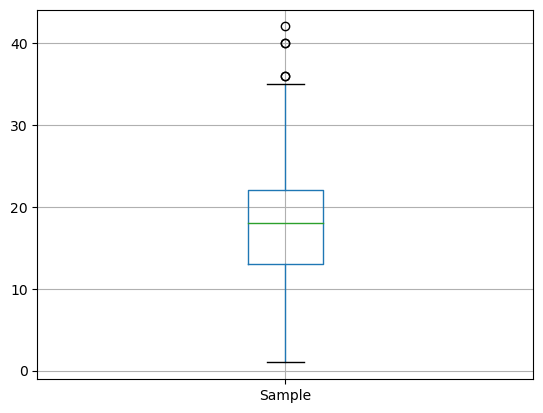

In [20]:
df_with_WGS_WES.groupby(by='WGS_WES').agg({'Sample':'count'}).sort_values(by='Sample', ascending=False).boxplot()
#медианное значение числа рнс-сек эксперементов на человека = 18. (У половины людей было больше 18, а половины меньше)

In [49]:
df_with_WGS_WES.to_csv(f'{path}/df_AEI_and_ADAR_expr_by_SRR.csv.gz', sep='\t',
                 index=False,
                 compression='gzip'
                 )

По-хорошему нужно назвать датайрейм REDIportal_filtered. А вместо simple.pickle : SRR_WGS_mapping

In [18]:
with open(f'{path}/Sample.pickle', 'wb') as f:
    pickle.dump(df_with_WGS_WES[['Sample', 'WGS_WES']], f)

## Совместная экспрессия семейства ADAR

In [21]:
df_with_WGS_WES['ADAR1_and_2'] = df_with_WGS_WES['ADAR'] + df_with_WGS_WES['ADARB1'] 
df_with_WGS_WES['ADAR1_and_2_3'] = df_with_WGS_WES['ADAR'] + df_with_WGS_WES['ADARB1'] + df_with_WGS_WES['ADARB2']

In [22]:
average_AEI_by_body_site = df_with_WGS_WES.query("Status == 'normal'").groupby('Body_Site') \
                                            .aggregate({'AEI':'mean'}).sort_values(by='AEI', ascending=False)
average_AEI_by_body_site.head(20)

,AEI
Body_Site,
Brain - Cerebellum,2.464071
Brain - Cerebellar Hemisphere,2.367764
Artery - Tibial,2.153364
Artery - Aorta,2.138582
Pituitary,2.065294
Nerve - Tibial,1.983580
Brain - Nucleus accumbens (basal ganglia),1.976315
Uterus,1.946229
Cervix - Endocervix,1.940800


In [23]:
average_AEI_by_body_site.shape

(53, 1)

## Отфильтруем только нераковые ткани (спойлер, в таблице изначально все такни нормальные)

In [24]:
number_of_samples_by_body_site = df_with_WGS_WES.query("Status == 'normal'").groupby('Body_Site') \
                                                                    .aggregate({'Sample':'count'}) \
                                                                    .sort_values(by='Sample', ascending=False)
number_of_samples_by_body_site

,Sample
Body_Site,
Muscle - Skeletal,414
Whole Blood,410
Skin - Sun Exposed (Lower leg),352
Lung,341
Adipose - Subcutaneous,334
Thyroid,325
Artery - Tibial,321
Esophagus - Mucosa,299
Nerve - Tibial,293


In [25]:
number_of_samples_by_body_site = df_with_WGS_WES.query("Status == 'normal'").groupby('Body_Site') \
                                                                    .aggregate({'Sample':'count'}) \
                                                                    .sort_values(by='Sample', ascending=False)
number_of_samples_by_body_site

,Sample
Body_Site,
Muscle - Skeletal,414
Whole Blood,410
Skin - Sun Exposed (Lower leg),352
Lung,341
Adipose - Subcutaneous,334
Thyroid,325
Artery - Tibial,321
Esophagus - Mucosa,299
Nerve - Tibial,293


In [26]:
number_of_samples_by_body_site.shape

(53, 1)

Так как тканей очень много, то для простоты визуального восприятия последующих графиков:

Отсечем ткани менее чем с 60 образцами

#Вариант с обрезкой всей таблицы. НО для построения boxplot был выбран более элегантный путь.
mask = df_with_WGS_WES['Body_Site'].isin(number_of_samples_by_body_site.query('Sample > 60').index.to_list())
df_with_WGS_WES[mask]

In [27]:
list_of_body_site_names = number_of_samples_by_body_site[number_of_samples_by_body_site['Sample'] > 60].index.to_list()
len(list_of_body_site_names)

48

<AxesSubplot:>

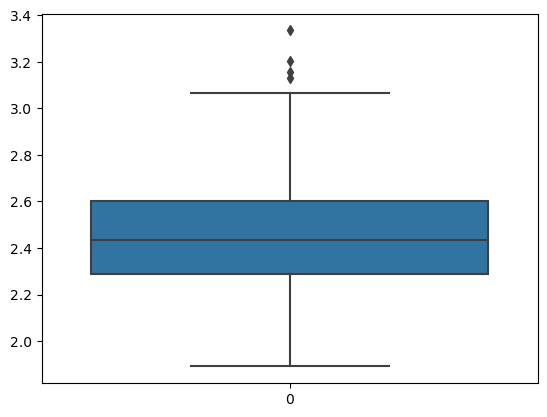

In [28]:
sns.boxplot(data = list_of_AEI_for_body(name_of_body = 'Brain - Cerebellum'))

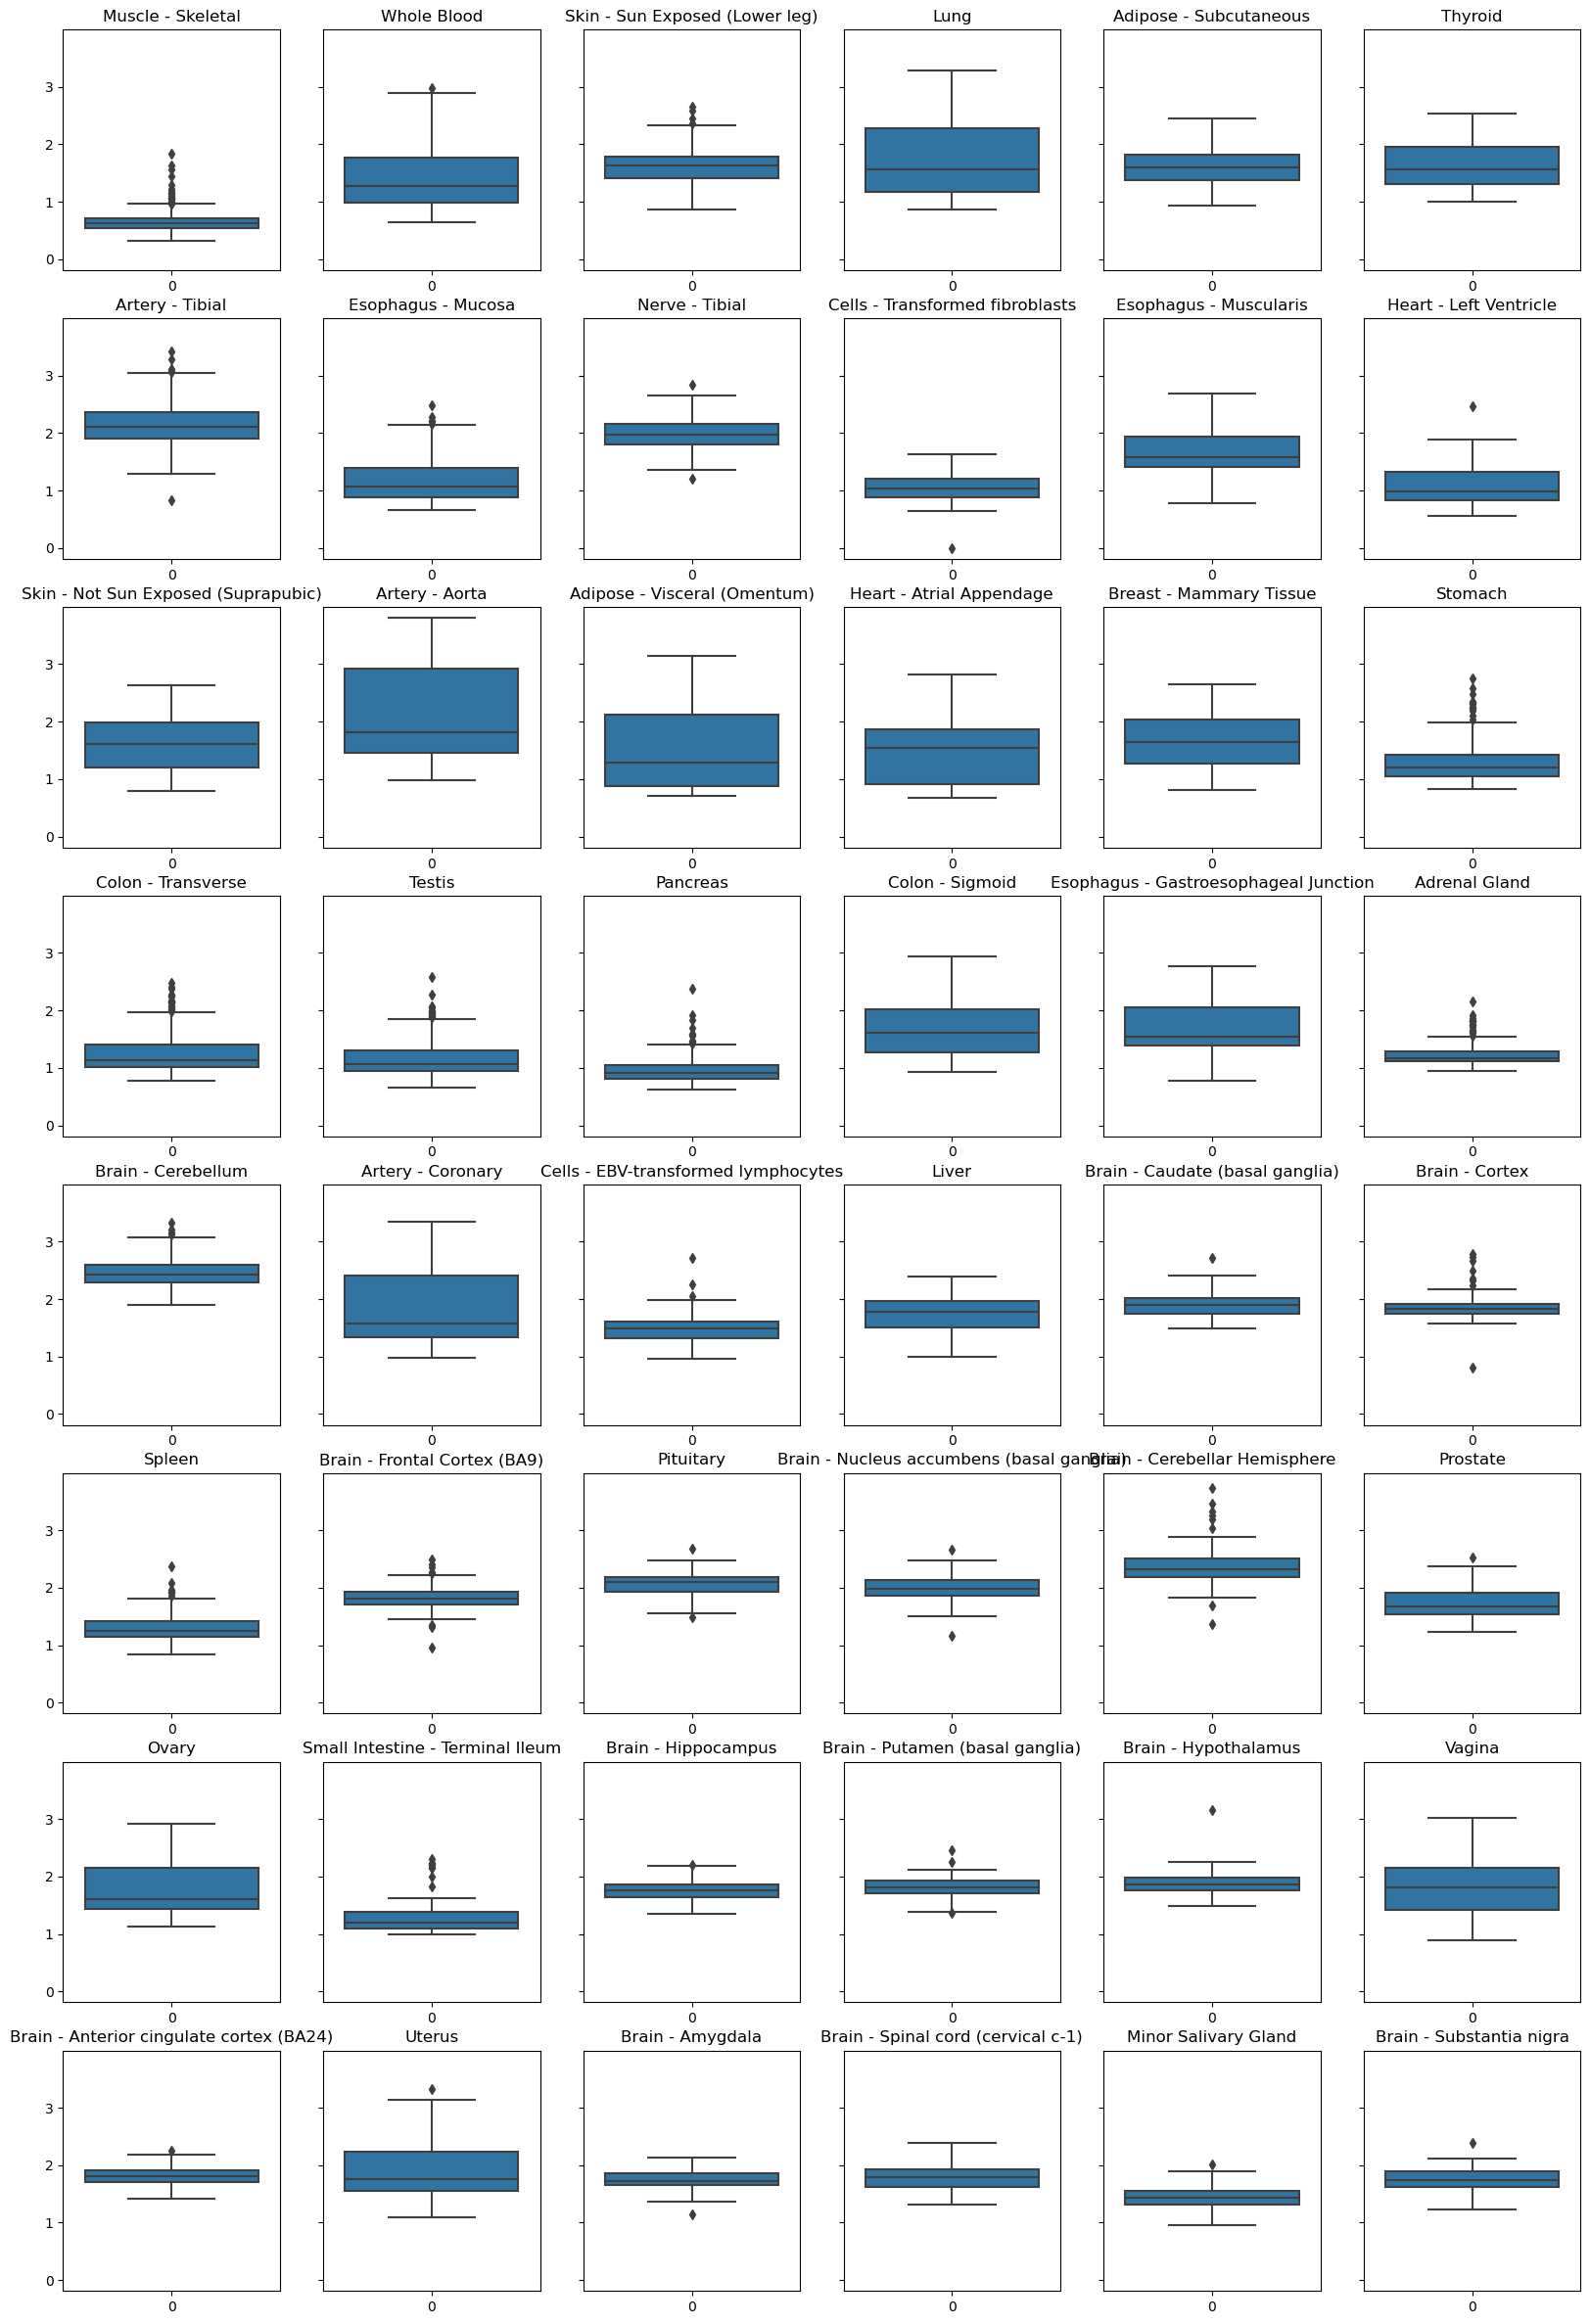

In [27]:
fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(20, 30), sharey=True)

for i, body in  enumerate(list_of_body_site_names):
    sns.boxplot(data = list_of_AEI_for_body(name_of_body = f'{body}'), ax=axes[int(i / 6), i % 6])
    axes[int(i / 6), i % 6].set_title(f'{body}')
    #axes[int(i / 6), i % 6].set_xlabel(f'{body}')
    #axes[int(i / 6), i % 6].set_ylabel('AEI')
fig.savefig(f"{path}/AEI_boxplots.png")

In [29]:
df_with_WGS_WES

,Sample,WGS_WES,Source,Organism,Events,Hyper,Body_Site,Status,Type,AEI,REI,ADAR,ADARB1,ADARB2,ADAR1_and_2,ADAR1_and_2_3
0,SRR1072367,SRR8233659,G,Hs,52840,29987,Brain - Frontal Cortex (BA9),normal,B,1.870,0.835,51.555,4.681,64.410,56.236,120.646
1,SRR1443612,SRR8233193,G,Hs,44534,0,Brain - Spinal cord (cervical c-1),normal,B,1.558,0.782,60.274,4.391,63.361,64.665,128.026
2,SRR1458595,SRR8233289,G,Hs,74729,0,Brain - Spinal cord (cervical c-1),normal,B,1.929,1.376,68.420,4.473,63.320,72.893,136.213
3,SRR1488172,SRR8233528,G,Hs,62948,0,Brain - Spinal cord (cervical c-1),normal,B,2.091,1.730,64.079,4.630,62.556,68.709,131.265
4,SRR1491311,SRR8233249,G,Hs,56807,0,Brain - Spinal cord (cervical c-1),normal,B,1.911,0.935,58.068,3.908,62.378,61.976,124.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8533,SRR1333125,SRR8233668,G,Hs,33367,0,Cells - Transformed fibroblasts,normal,B,1.043,2.838,61.867,68.293,0.000,130.160,130.160
8534,SRR1080720,SRR8233560,G,Hs,34467,10591,Cells - Transformed fibroblasts,normal,B,1.221,1.082,96.526,129.248,0.000,225.774,225.774
8535,SRR1318966,SRR8233627,G,Hs,63043,0,Cells - Transformed fibroblasts,normal,B,1.195,0.809,147.086,68.348,0.000,215.434,215.434
8536,SRR1445218,SRR8233294,G,Hs,44149,0,Liver,normal,B,1.698,1.088,22.641,6.698,0.000,29.339,29.339


In [29]:
df_with_WGS_WES.Status.unique()

array(['normal'], dtype=object)

In [30]:
average_AEI_and_expression_by_body =  df_with_WGS_WES.groupby(by='Body_Site').aggregate({'AEI':'mean', 'ADAR':'mean'})
average_AEI_and_expression_by_body.head()

,AEI,ADAR
Body_Site,,
Adipose - Subcutaneous,1.614545,74.126617
Adipose - Visceral (Omentum),1.488394,61.803676
Adrenal Gland,1.242633,57.125245
Artery - Aorta,2.138582,86.404756
Artery - Coronary,1.832702,77.427750


<AxesSubplot:xlabel='ADAR', ylabel='AEI'>

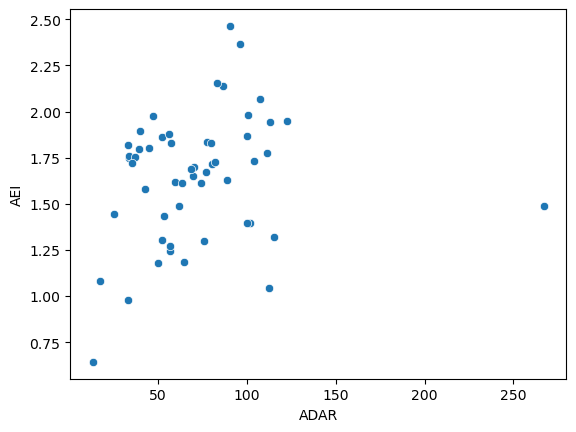

In [32]:
sns.scatterplot(data = average_AEI_and_expression_by_body, x = 'ADAR', y = 'AEI')

In [31]:
list_of_expression_for_body(name_of_body = 'Adipose - Subcutaneous', type_of_genes = 'ADAR')# Проверка работы функции

[91.629,
 81.209,
 83.276,
 82.602,
 65.343,
 76.222,
 95.338,
 68.18,
 90.332,
 83.38,
 91.295,
 70.014,
 82.59,
 67.322,
 69.451,
 90.902,
 96.308,
 86.64,
 67.193,
 58.864,
 82.21,
 66.366,
 69.922,
 55.267,
 46.239,
 63.359,
 53.087,
 54.526,
 68.739,
 78.732,
 53.868,
 69.74,
 74.26,
 82.567,
 58.437,
 69.6,
 59.908,
 72.355,
 86.08,
 86.982,
 78.689,
 76.875,
 87.065,
 55.77,
 70.008,
 57.045,
 65.137,
 75.295,
 70.269,
 76.593,
 99.347,
 72.567,
 65.568,
 63.81,
 79.368,
 76.89,
 73.389,
 63.361,
 64.877,
 82.005,
 54.184,
 53.263,
 79.473,
 74.821,
 54.167,
 82.113,
 73.835,
 102.025,
 71.037,
 66.943,
 65.23,
 81.788,
 91.704,
 84.802,
 70.447,
 75.838,
 102.528,
 84.939,
 83.283,
 60.891,
 94.329,
 75.624,
 53.087,
 55.625,
 68.364,
 56.748,
 60.529,
 79.723,
 78.434,
 57.163,
 71.659,
 76.199,
 64.413,
 78.043,
 60.12,
 70.111,
 80.802,
 63.915,
 67.65,
 67.324,
 70.713,
 81.571,
 89.126,
 65.622,
 59.895,
 96.789,
 58.174,
 67.788,
 75.424,
 71.642,
 61.523,
 91.703,
 82.99

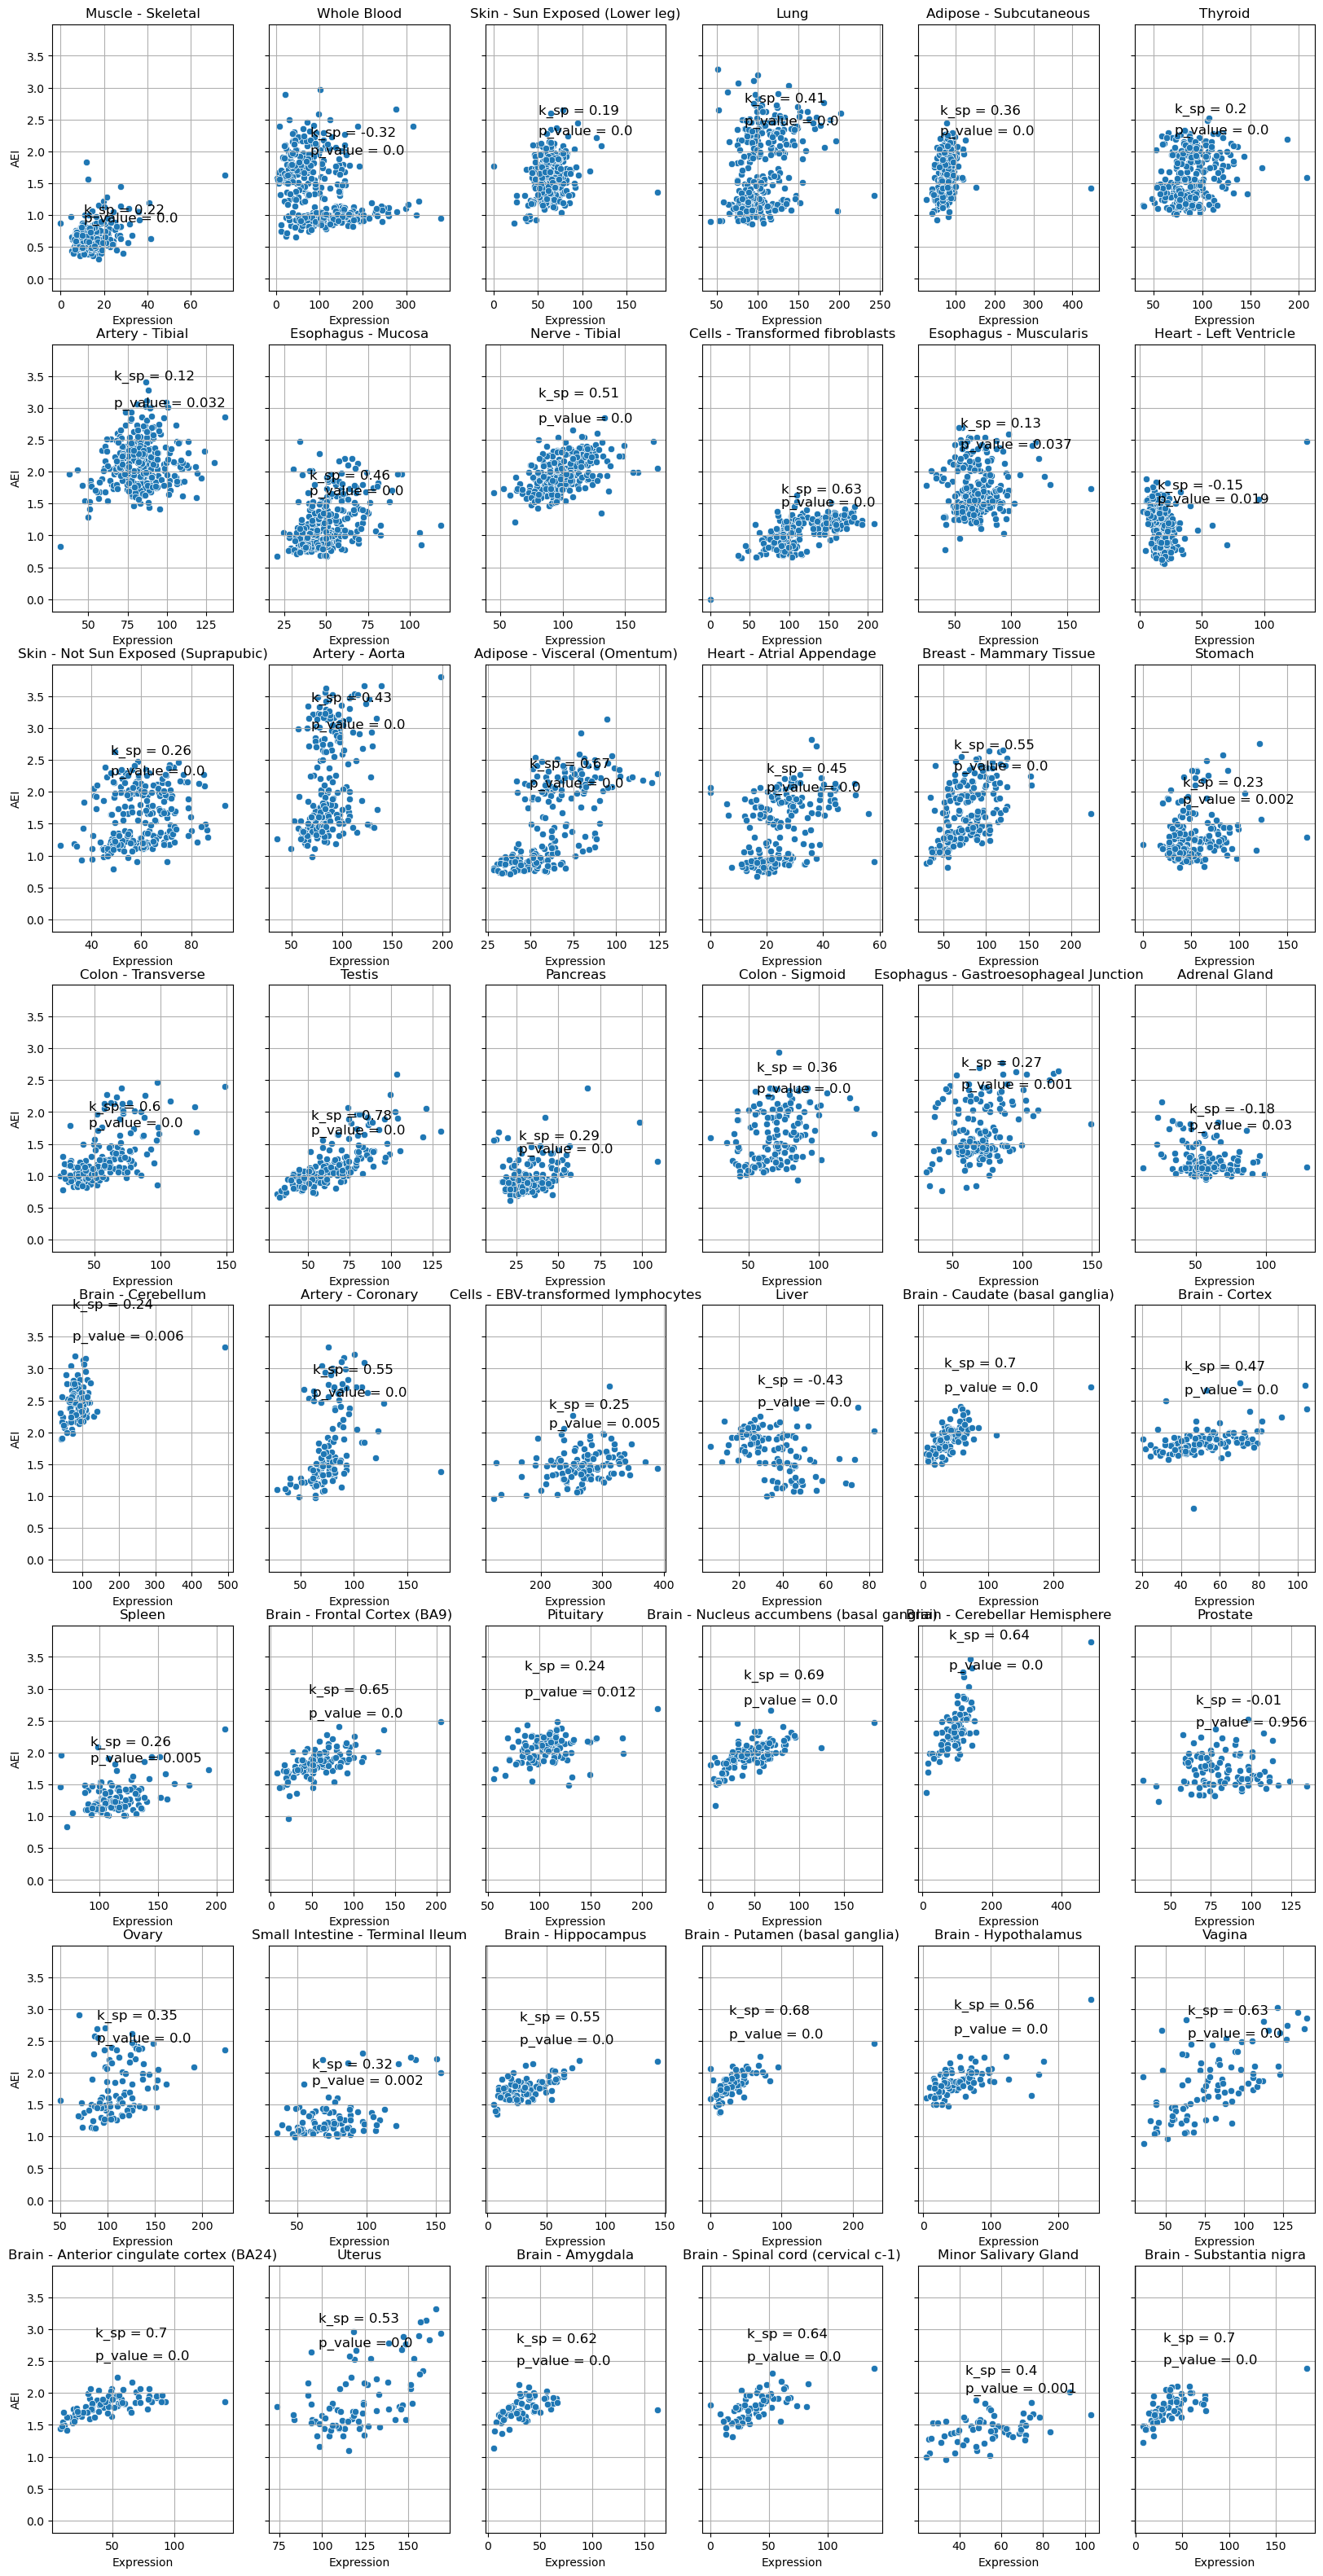

In [34]:
fig, axes = plt.subplots(nrows=8, ncols=6, figsize=(20, 40), sharey=True)
k_sp_list = list()
p_value_list = list()
spearman_res_list = list()
for i, body in  enumerate(list_of_body_site_names):
    x = list_of_expression_for_body(name_of_body = f'{body}', type_of_genes = 'ADAR')
    y = list_of_AEI_for_body(name_of_body = f'{body}')
    sns.scatterplot(x = x, y = y, ax=axes[int(i / 6), i % 6])
    k_sp, p_value = stats.spearmanr(x, y, alternative = 'two-sided')
    k_sp_list.append(k_sp)
    p_value_list.append(p_value)
    spearman_res_list.append([k_sp, p_value])
    
    axes[int(i / 6), i % 6].text(np.mean(x)*0.8, np.mean(y)*1.6, f'k_sp = {round(k_sp, 2)}', size=12)
    axes[int(i / 6), i % 6].text(np.mean(x)*0.8, np.mean(y)*1.4, f'p_value = {round(p_value, 3)}', size=12)
    axes[int(i / 6), i % 6].set_title(f'{body}')
    axes[int(i / 6), i % 6].set_xlabel('Expression')
    axes[int(i / 6), i % 6].set_ylabel('AEI')
    axes[int(i / 6), i % 6].grid() 
fig.savefig(f"{path}/AEI_Expression.png")

Проверка на адекватность результатов

In [35]:
list_of_body_site_names

['Muscle - Skeletal',
 'Whole Blood',
 'Skin - Sun Exposed (Lower leg)',
 'Lung',
 'Adipose - Subcutaneous',
 'Thyroid',
 'Artery - Tibial',
 'Esophagus - Mucosa',
 'Nerve - Tibial',
 'Cells - Transformed fibroblasts',
 'Esophagus - Muscularis',
 'Heart - Left Ventricle',
 'Skin - Not Sun Exposed (Suprapubic)',
 'Artery - Aorta',
 'Adipose - Visceral (Omentum)',
 'Heart - Atrial Appendage',
 'Breast - Mammary Tissue',
 'Stomach',
 'Colon - Transverse',
 'Testis',
 'Pancreas',
 'Colon - Sigmoid',
 'Esophagus - Gastroesophageal Junction',
 'Adrenal Gland',
 'Brain - Cerebellum',
 'Artery - Coronary',
 'Cells - EBV-transformed lymphocytes',
 'Liver',
 'Brain - Caudate (basal ganglia)',
 'Brain - Cortex',
 'Spleen',
 'Brain - Frontal Cortex (BA9)',
 'Pituitary',
 'Brain - Nucleus accumbens (basal ganglia)',
 'Brain - Cerebellar Hemisphere',
 'Prostate',
 'Ovary',
 'Small Intestine - Terminal Ileum',
 'Brain - Hippocampus',
 'Brain - Putamen (basal ganglia)',
 'Brain - Hypothalamus',
 'Vagi

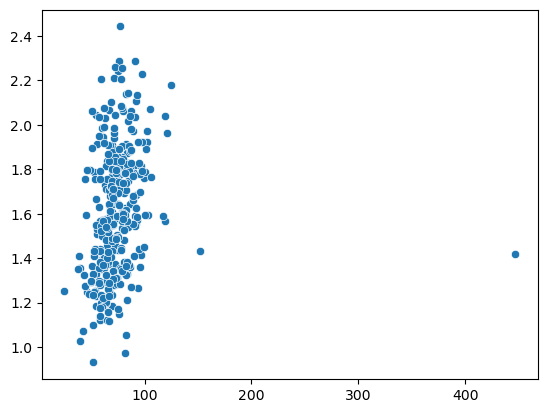

In [36]:
x = list_of_expression_for_body(name_of_body = 'Adipose - Subcutaneous', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Adipose - Subcutaneous')
sns.scatterplot(x = x, y = y)
k_sp, p_value = stats.spearmanr(x, y, alternative = 'greater')

In [37]:
k_sp

0.3632072813145597

Violinplot

In [38]:
spearman_res_list

[[0.21525851137118945, 9.937701047195957e-06],
 [-0.3196779828832364, 3.404121608349207e-11],
 [0.18904693269819647, 0.00036187715741969683],
 [0.40528632761620426, 6.513767028798359e-15],
 [0.3632072813145597, 7.476077491913265e-12],
 [0.19824168533297157, 0.0003233531928997324],
 [0.12005460564969694, 0.03152776171873693],
 [0.4572243308749083, 7.490862567457783e-17],
 [0.5078326042125748, 1.2957836846855252e-20],
 [0.6298285544695449, 1.810469155124102e-31],
 [0.1294105011283736, 0.037401792950718285],
 [-0.15024394112586462, 0.01886548456368811],
 [0.25552298789750205, 6.438945903332868e-05],
 [0.42744833315988223, 2.0796645291473452e-11],
 [0.6653671142570106, 1.3334766507780424e-28],
 [0.44751725141821125, 6.06550108213393e-11],
 [0.5458427246862168, 2.223936364410084e-16],
 [0.22882385982224832, 0.0015854841103403567],
 [0.5975813027688146, 3.4009600031096836e-19],
 [0.7761875618864511, 2.693400946535778e-37],
 [0.28644635272443586, 0.00011613702717568097],
 [0.36088309711938643

In [42]:
spearman_res_list_with_name = list()
for sp, name in zip(spearman_res_list, list_of_body_site_names):
    spearman_res_list_with_name.append([sp[0], sp[1], name])

In [147]:
df_analysis = pd.DataFrame({'k_sp':k_sp_list, 'p-value':p_value_list, 'name':list_of_body_site_names})
df_analysis.head()

,k_sp,p-value,name
0,0.215259,9.937701e-06,Muscle - Skeletal
1,-0.319678,3.404122e-11,Whole Blood
2,0.189047,3.618772e-04,Skin - Sun Exposed (Lower leg)
3,0.405286,6.513767e-15,Lung
4,0.363207,7.476077e-12,Adipose - Subcutaneous


In [149]:
pval_adj = multipletests(df_analysis['p-value'], alpha=0.001, method='fdr_bh', is_sorted=False, returnsorted=False)

In [150]:
df_analysis['p-value_adj'] = pval_adj[1]

In [155]:
class_list = list()
alpha_list = list()
color_list = list()
for k_sp, p in zip(df_analysis['k_sp'], df_analysis['p-value_adj']):
    if k_sp == max(k_sp_list) or np.round(k_sp, 2) == -0.43:
        color_list.append('orange')
    else:
        color_list.append('blue')
    if p > 0.001:
        class_list.append("Не значимо")
        alpha_list.append(0.3)
    else:
        alpha_list.append(1)
        if k_sp > 0:
            class_list.append("Значимо больше 0")
        elif k_sp < 0:
            class_list.append("Значимо меньше 0")

In [156]:
df_analysis['class'] = class_list
df_analysis['alpha'] = alpha_list
df_analysis['color'] = color_list

In [157]:
df_analysis.head()

,k_sp,p-value,name,p-value_adj,class,alpha,color
0,0.215259,9.937701e-06,Muscle - Skeletal,1.590032e-05,Значимо больше 0,1.0,blue
1,-0.319678,3.404122e-11,Whole Blood,9.153784e-11,Значимо меньше 0,1.0,blue
2,0.189047,3.618772e-04,Skin - Sun Exposed (Lower leg),5.108854e-04,Значимо больше 0,1.0,blue
3,0.405286,6.513767e-15,Lung,3.126608e-14,Значимо больше 0,1.0,blue
4,0.363207,7.476077e-12,Adipose - Subcutaneous,2.392345e-11,Значимо больше 0,1.0,blue


In [158]:
df_analysis.query(f"k_sp == {max(k_sp_list)}")

,k_sp,p-value,name,p-value_adj,class,alpha,color
19,0.776188,2.693401e-37,Testis,1.292832e-35,Значимо больше 0,1.0,orange


In [159]:
df_analysis.query(f"k_sp == {min(k_sp_list)}")

,k_sp,p-value,name,p-value_adj,class,alpha,color
27,-0.427074,0.000001,Liver,0.000002,Значимо меньше 0,1.0,orange


def classification(x):
    if x > 0.001:
        x = "Не значимо"
    return x

def classification_2(x):
    if type(x) != str:
        if x > 0:
            x = "Значимо больше 0"
        elif x < 0:
            x = "Значимо меньше 0"
    else:
        x = x
    return x

df_violin['class'] = df_violin['p-value'].apply(classification)

df_violin['class'] = df_violin['class'].apply(classification_2)

df_violin.head(10)

(array([ True,  True,  True,  True,  True,  True, False,  True,  True,
         True, False, False,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True, False, False,  True, False,
         True,  True,  True, False,  True, False,  True,  True, False,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True]),
 array([1.59003217e-05, 9.15378421e-11, 5.10885399e-04, 3.12660817e-14,
        2.39234480e-11, 4.70331917e-04, 3.28985340e-02, 5.05833799e-16,
        1.55494042e-19, 4.34512597e-30, 3.81975758e-02, 2.05805286e-02,
        9.96998075e-05, 6.23899359e-11, 2.13356264e-27, 1.45572026e-10,
        1.18609939e-15, 2.00271677e-03, 3.26492160e-18, 1.29283245e-35,
        1.74205541e-04, 4.91032473e-06, 9.33652655e-04, 3.23220491e-02,
        6.87727816e-03, 1.19572004e-10, 5.50825328e-03, 1.96723662e-06,
        4.82601574e-18, 2.00223584e-07, 6.24837973e-03, 1.47286120e-13,
        1.32393001e-02, 5.05833799e-16

In [145]:
df_analysis

,k_sp,p-value,name,class,alpha,color,pval_adj
0,0.215259,9.937701e-06,Muscle - Skeletal,Значимо больше 0,1.0,blue,1.590032e-05
1,-0.319678,3.404122e-11,Whole Blood,Значимо меньше 0,1.0,blue,9.153784e-11
2,0.189047,3.618772e-04,Skin - Sun Exposed (Lower leg),Значимо больше 0,1.0,blue,5.108854e-04
3,0.405286,6.513767e-15,Lung,Значимо больше 0,1.0,blue,3.126608e-14
4,0.363207,7.476077e-12,Adipose - Subcutaneous,Значимо больше 0,1.0,blue,2.392345e-11
5,0.198242,3.233532e-04,Thyroid,Значимо больше 0,1.0,blue,4.703319e-04
6,0.120055,3.152776e-02,Artery - Tibial,Не значимо,0.3,blue,3.289853e-02
7,0.457224,7.490863e-17,Esophagus - Mucosa,Значимо больше 0,1.0,blue,5.058338e-16
8,0.507833,1.295784e-20,Nerve - Tibial,Значимо больше 0,1.0,blue,1.554940e-19
9,0.629829,1.810469e-31,Cells - Transformed fibroblasts,Значимо больше 0,1.0,blue,4.345126e-30


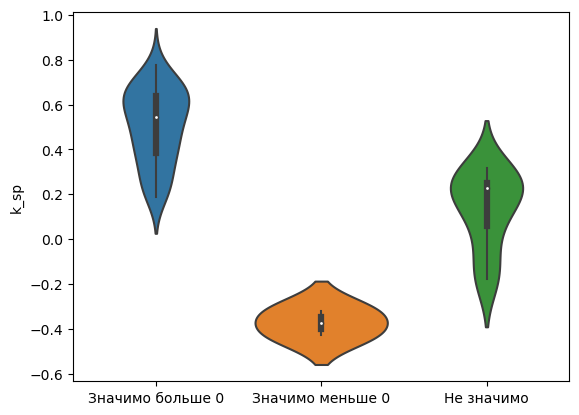

In [49]:
fig = sns.violinplot(data=df_analysis, x="class", y="k_sp")
fig.set(xlabel=None)
plt.show()

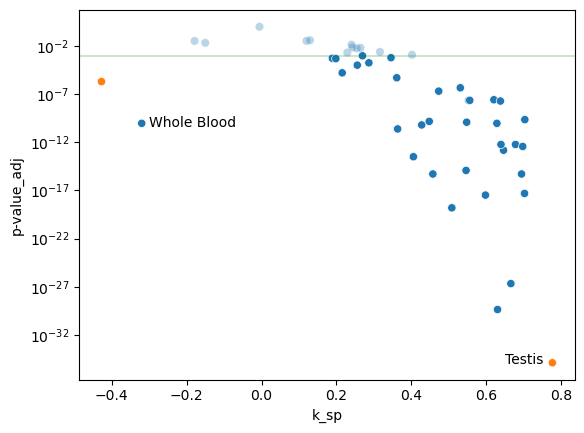

In [160]:
ax = sns.scatterplot(data=df_analysis, x="k_sp", y="p-value_adj", alpha=df_analysis['alpha'].to_list(), hue=df_analysis['color'])
ax.set(yscale="log")
plt.axhline(y=0.001, xmin=0, xmax=1, color='g', alpha=0.2)
plt.text(x=-0.3, y=3.5e-11, s='Whole Blood')
plt.text(x=0.65, y=min(p_value_list)+1e-35, s='Testis')
legend = ax.legend()
legend.remove()
plt.show()
#c=df_analysis['color'].to_list()

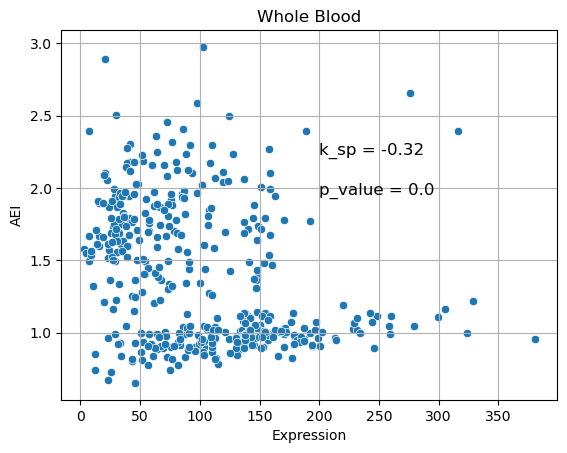

In [51]:
x = list_of_expression_for_body(name_of_body = 'Whole Blood', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Whole Blood')
ax = sns.scatterplot(x = x, y = y)
k_sp, p_value = stats.spearmanr(x, y, alternative = 'two-sided')
ax.text(200, np.mean(y)*1.6, f'k_sp = {round(k_sp, 2)}', size=12)
ax.text(200, np.mean(y)*1.4, f'p_value = {round(p_value, 3)}', size=12)
ax.set_title('Whole Blood')
ax.set_xlabel('Expression')
ax.set_ylabel('AEI')
ax.grid() 

In [162]:
df_analysis.query(f"name == 'Liver'")

,k_sp,p-value,name,p-value_adj,class,alpha,color
27,-0.427074,0.000001,Liver,0.000002,Значимо меньше 0,1.0,orange


In [163]:
df_analysis.query(f"name == 'Testis'")

,k_sp,p-value,name,p-value_adj,class,alpha,color
19,0.776188,2.693401e-37,Testis,1.292832e-35,Значимо больше 0,1.0,orange


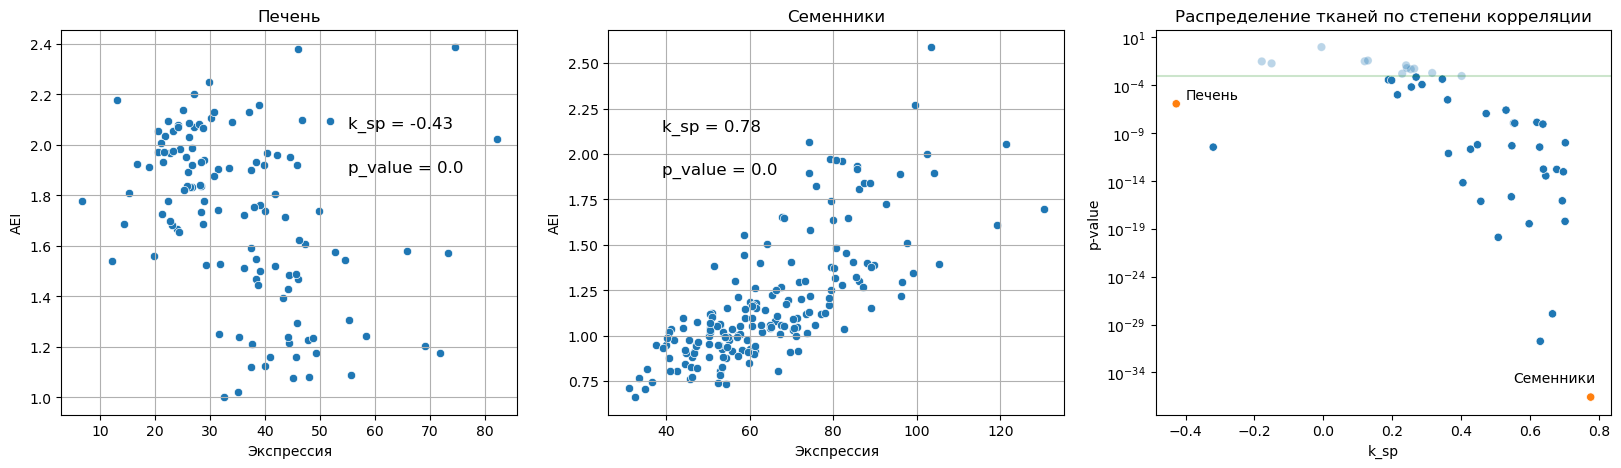

In [165]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
x = list_of_expression_for_body(name_of_body = 'Liver', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Liver')
sns.scatterplot(x = x, y = y, ax=axes[0])
k_sp, p_value = -0.427074, 0.000002
axes[0].text(55, np.mean(y)*1.2, f'k_sp = {round(k_sp, 2)}', size=12)
axes[0].text(55, np.mean(y)*1.1, f'p_value = {round(p_value, 3)}', size=12)
axes[0].set_title('Печень')
axes[0].set_xlabel('Экспрессия')
axes[0].set_ylabel('AEI')
axes[0].grid() 

x = list_of_expression_for_body(name_of_body = 'Testis', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Testis')
sns.scatterplot(x = x, y = y, ax=axes[1])
k_sp, p_value = 0.776188, 1.292832e-35
axes[1].text(39, np.mean(y)*1.8, f'k_sp = {round(k_sp, 2)}', size=12)
axes[1].text(39, np.mean(y)*1.6, f'p_value = {round(p_value, 3)}', size=12)
axes[1].set_title('Семенники')
axes[1].set_xlabel('Экспрессия')
axes[1].set_ylabel('AEI')
axes[1].grid() 

axes[2] = sns.scatterplot(data=df_analysis, x="k_sp", y="p-value", alpha=df_analysis['alpha'].to_list(), hue=df_analysis['color'])
axes[2].set(yscale="log")
plt.axhline(y=0.001, xmin=0, xmax=1, color='g', alpha=0.2)
axes[2].set_title('Распределение тканей по степени корреляции')
plt.text(x=-0.4, y=3.5e-6, s='Печень')
plt.text(x=0.55, y=min(p_value_list)+1e-35, s='Семенники')
legend = axes[2].legend()
legend.remove()
plt.show()

fig.savefig(f"{path}/images/Распределение тканей по степени корреляции (FDR).jpg")

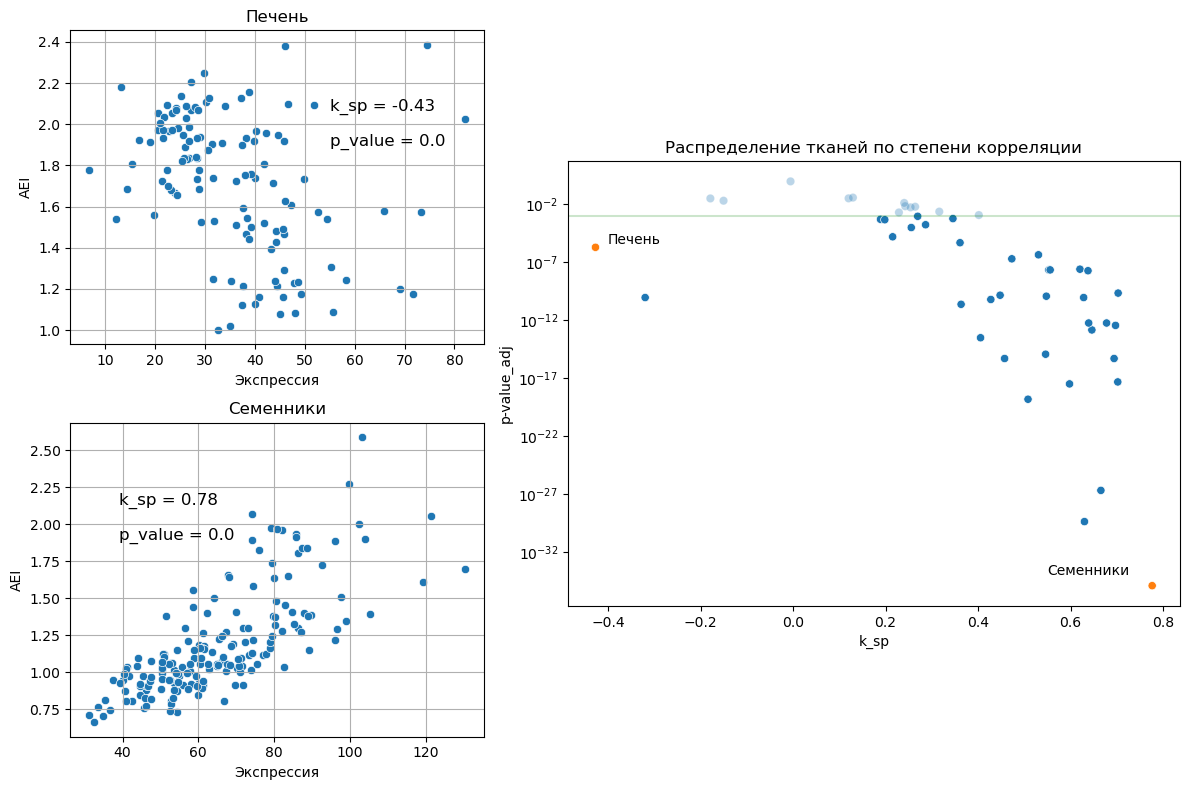

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(12, 8))
gs = gridspec.GridSpec(6, 12)

ax0 = fig.add_subplot(gs[:3, :5])
x = list_of_expression_for_body(name_of_body = 'Liver', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Liver')
sns.scatterplot(x = x, y = y, ax=ax0)
k_sp, p_value = -0.427074, 0.000002
ax0.text(55, np.mean(y)*1.2, f'k_sp = {round(k_sp, 2)}', size=12)
ax0.text(55, np.mean(y)*1.1, f'p_value = {round(p_value, 3)}', size=12)
ax0.set_title('Печень')
ax0.set_xlabel('Экспрессия')
ax0.set_ylabel('AEI')
ax0.grid() 

ax1 = fig.add_subplot(gs[3:, :5])
x = list_of_expression_for_body(name_of_body = 'Testis', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Testis')
sns.scatterplot(x = x, y = y, ax=ax1)
k_sp, p_value = 0.776188, 1.292832e-35
ax1.text(39, np.mean(y)*1.8, f'k_sp = {round(k_sp, 2)}', size=12)
ax1.text(39, np.mean(y)*1.6, f'p_value = {round(p_value, 3)}', size=12)
ax1.set_title('Семенники')
ax1.set_xlabel('Экспрессия')
ax1.set_ylabel('AEI')
ax1.grid() 

ax2 = fig.add_subplot(gs[1:5, 5:])
sns.scatterplot(data=df_analysis, x="k_sp", y="p-value_adj", alpha=df_analysis['alpha'].to_list(), hue=df_analysis['color'], ax=ax2)
ax2.set(yscale="log")
plt.axhline(y=0.001, xmin=0, xmax=1, color='g', alpha=0.2)
ax2.set_title('Распределение тканей по степени корреляции')
plt.text(x=-0.4, y=3.5e-6, s='Печень')
plt.text(x=0.55, y=min(p_value_list)+1e-34, s='Семенники')
legend = ax2.legend()
legend.remove()
plt.show()
fig.savefig(f"{path}/images/Распределение тканей по степени корреляции (FDR).jpg")

In [167]:
df_analysis

,k_sp,p-value,name,p-value_adj,class,alpha,color
0,0.215259,9.937701e-06,Muscle - Skeletal,1.590032e-05,Значимо больше 0,1.0,blue
1,-0.319678,3.404122e-11,Whole Blood,9.153784e-11,Значимо меньше 0,1.0,blue
2,0.189047,3.618772e-04,Skin - Sun Exposed (Lower leg),5.108854e-04,Значимо больше 0,1.0,blue
3,0.405286,6.513767e-15,Lung,3.126608e-14,Значимо больше 0,1.0,blue
4,0.363207,7.476077e-12,Adipose - Subcutaneous,2.392345e-11,Значимо больше 0,1.0,blue
5,0.198242,3.233532e-04,Thyroid,4.703319e-04,Значимо больше 0,1.0,blue
6,0.120055,3.152776e-02,Artery - Tibial,3.289853e-02,Не значимо,0.3,blue
7,0.457224,7.490863e-17,Esophagus - Mucosa,5.058338e-16,Значимо больше 0,1.0,blue
8,0.507833,1.295784e-20,Nerve - Tibial,1.554940e-19,Значимо больше 0,1.0,blue
9,0.629829,1.810469e-31,Cells - Transformed fibroblasts,4.345126e-30,Значимо больше 0,1.0,blue


In [114]:
x = list_of_expression_for_body(name_of_body = 'Lung', type_of_genes = 'ADAR')
y = list_of_AEI_for_body(name_of_body = 'Lung')
sns.scatterplot(x = x, y = y, ax=ax)
k_sp, p_value = stats.spearmanr(x, y, alternative = 'two-sided')

In [115]:
k_sp

0.40528632761620426

In [74]:
print(gs)

GridSpec(2, 4)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[0, 0])
ax.plot(np.arange(0, 1e6, 1000))
ax.set_ylabel('YLabel0')
ax.set_xlabel('XLabel0')

for i in range(2):
    ax = fig.add_subplot(gs[1, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)
    if i == 0:
        ax.tick_params(axis='x', rotation=55)
fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()

In [161]:
print(type(df_analysis['alpha']))
print(type(df_analysis['alpha'].to_list()))

<class 'pandas.core.series.Series'>
<class 'list'>


In [46]:
np.array(list_of_body_site_names)[[0,10]]

array(['Muscle - Skeletal', 'Esophagus - Muscularis'], dtype='<U41')

In [67]:
index = list()
k = 0
for i, body in  enumerate(list_of_body_site_names):
    x = list_of_expression_for_body(name_of_body = f'{body}', type_of_genes = 'ADAR')
    y = list_of_AEI_for_body(name_of_body = f'{body}')
    k_sp, p_value = stats.spearmanr(x, y, alternative = 'greater')
    if p_value < 0.05 and k_sp > 0.5:
        index.append(i)
        k += 1
k

20

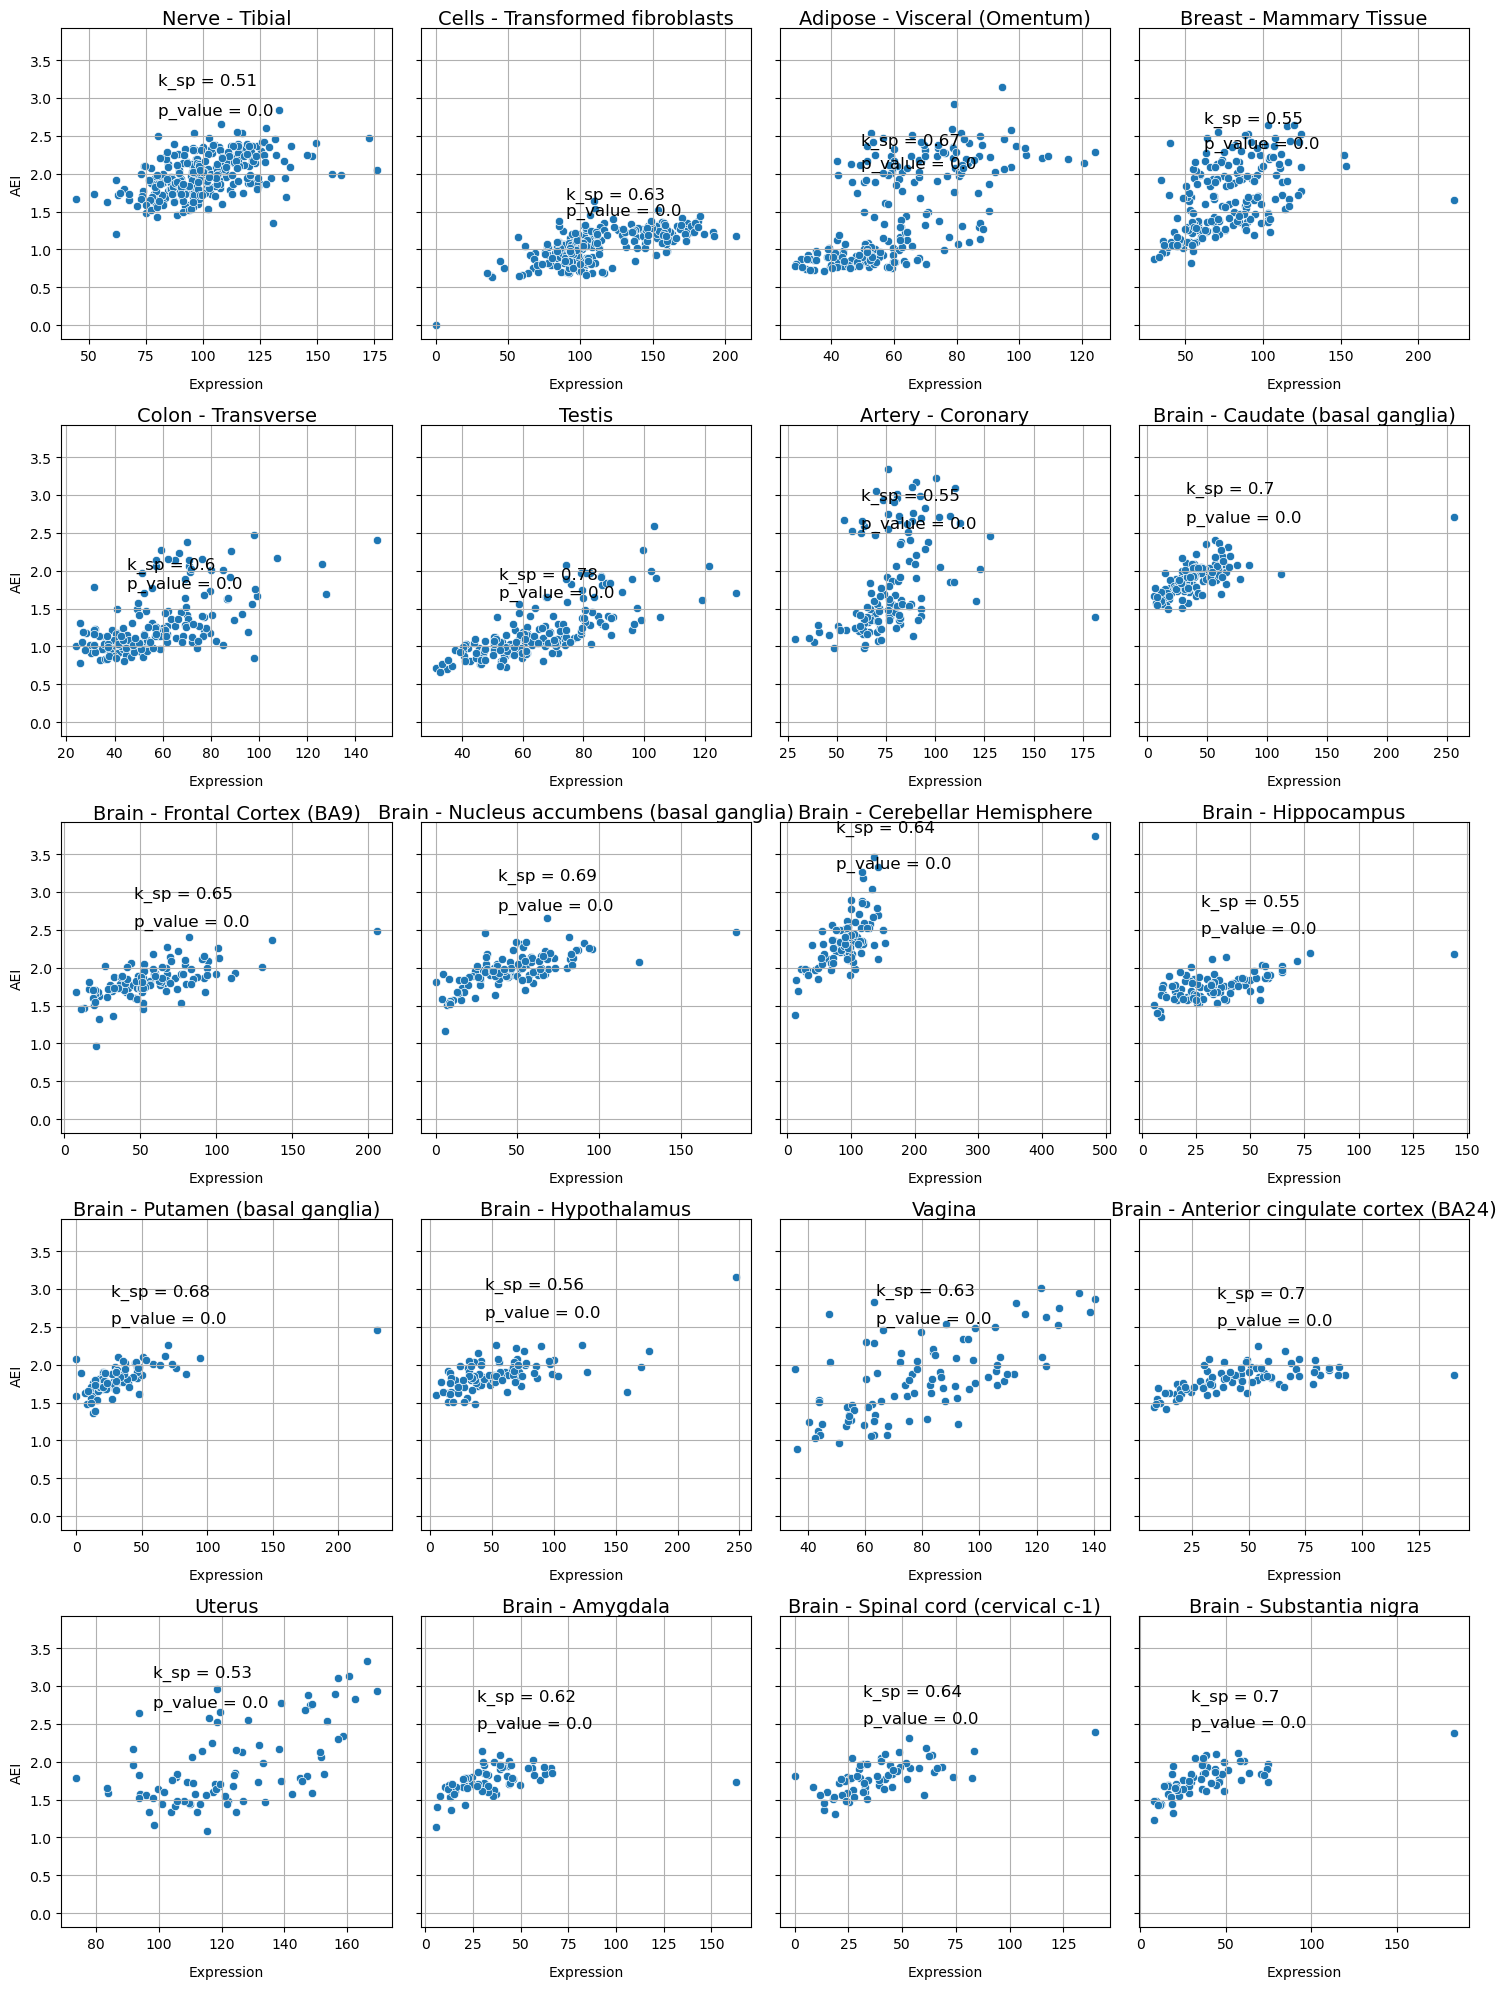

In [87]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 20), sharey=True)

for i, body in  enumerate(list(np.array(list_of_body_site_names)[index])):
    x = list_of_expression_for_body(name_of_body = f'{body}', type_of_genes = 'ADAR')
    y = list_of_AEI_for_body(name_of_body = f'{body}')
    sns.scatterplot(x = x, y = y, ax=axes[int(i / 4), i % 4])
    k_sp, p_value = stats.spearmanr(x, y, alternative = 'greater')
    axes[int(i / 4), i % 4].text(np.mean(x)*0.8, np.mean(y)*1.6, f'k_sp = {round(k_sp, 2)}', size=12)
    axes[int(i / 4), i % 4].text(np.mean(x)*0.8, np.mean(y)*1.4, f'p_value = {round(p_value, 3)}', size=12)
    axes[int(i / 4), i % 4].set_title(f'{body}', fontsize=14, pad=1)
    axes[int(i / 4), i % 4].set_xlabel('Expression', labelpad=10)
    axes[int(i / 4), i % 4].set_ylabel('AEI')
    axes[int(i / 4), i % 4].grid() 
    plt.tight_layout()